# Punto 1

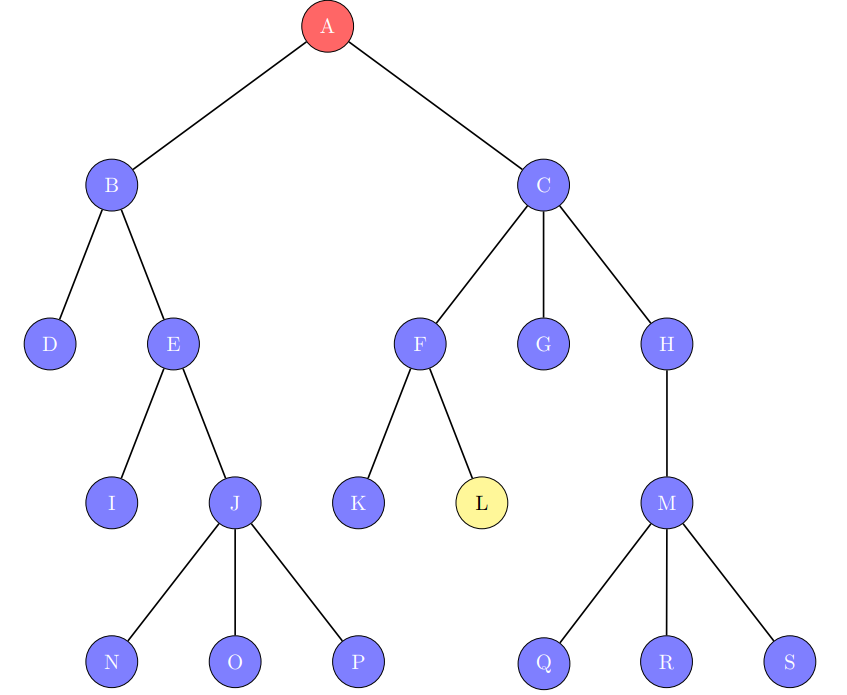

### DFS

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display, clear_output
import time
import random
from collections import deque

In [2]:
lista_adyacencia = {
    'A': ['B', 'C'],
    'B': ['D', 'E'],
    'C': ['F', 'G', 'H'],
    'D': [],
    'E': ['I', 'J'],
    'F': ['K', 'L'],
    'G': [],
    'H': ['M'],
    'I': [],
    'J': ['N', 'O', 'P'],
    'K': [],
    'L': [],
    'M': ['Q', 'R', 'S'],
    'N': [],
    'O': [],
    'P': [],
    'Q': [],
    'R': [],
    'S': []
}

In [3]:

G = nx.DiGraph()
for nodo, hijos in lista_adyacencia.items():
    for hijo in hijos:
        G.add_edge(nodo, hijo)

visitados = []

def dfs(nodo):
    visitados.append(nodo)
    for hijo in lista_adyacencia[nodo]:
        if hijo not in visitados:
            dfs(hijo)

visitados.clear()
dfs('A')

def hierarchical_pos(G, root='A', width=2., vert_gap=0.6, xcenter=0.5):
    pos = {}
    _place_nodes(G, root, width, vert_gap, xcenter, pos, None)
    return pos

def _place_nodes(G, nodo, width, vert_gap, xcenter, pos, parent):
    if parent is None:
        pos[nodo] = (xcenter, 1.0)
    else:
        level = pos[parent][1] - vert_gap
        siblings = lista_adyacencia[parent]
        index = siblings.index(nodo)
        offset = width / max(len(siblings), 1)
        pos[nodo] = (xcenter - (width / 2) + (index + 0.5) * offset, level)

    for hijo in lista_adyacencia[nodo]:
        _place_nodes(G, hijo, width/2, vert_gap, pos[nodo][0], pos, nodo)

pos = hierarchical_pos(G)

colores_padres = {}
paleta = ['skyblue', 'lightgreen', 'lightcoral', 'lightsalmon', 'plum', 'khaki', 'lightpink', 'lightseagreen']

def asignar_color_ramas(nodo, color=None):
    if color is None:
        color = random.choice(paleta)
        paleta.remove(color)

    colores_padres[nodo] = color
    for hijo in lista_adyacencia[nodo]:
        asignar_color_ramas(hijo, color)

asignar_color_ramas('A')

def dibujar_grafo(paso):
    plt.figure(figsize=(12, 8))
    colores = ['red' if nodo in visitados[:paso] else colores_padres[nodo] for nodo in G.nodes()]

    nx.draw(G, pos, with_labels=True, node_size=1000,
            node_color=colores, font_size=10, font_color='black', arrows=False)

    plt.title(f"DFS - Paso {paso}/{len(visitados)}: {visitados[:paso]}")
    plt.show()


output = widgets.Output()

boton_siguiente = widgets.Button(description="Siguiente")
boton_automatico = widgets.Button(description="Ejecutar Automático")

estado = {'paso': 0, 'automatico': False}

def avanzar_paso():
    if estado['paso'] >= len(visitados):
        estado['paso'] = 0
    else:
        estado['paso'] += 1

    with output:
        clear_output(wait=True)
        dibujar_grafo(estado['paso'])

def al_hacer_click_siguiente(b):
    estado['automatico'] = False
    avanzar_paso()

def al_hacer_click_automatico(b):
    estado['automatico'] = True
    while estado['paso'] < len(visitados) and estado['automatico']:
        avanzar_paso()
        time.sleep(0.8)

    if estado['paso'] >= len(visitados):
        estado['paso'] = 0  # Reinicia al final automáticamente


boton_siguiente.on_click(al_hacer_click_siguiente)
boton_automatico.on_click(al_hacer_click_automatico)


In [4]:
display(widgets.HBox([boton_siguiente, boton_automatico]), output)

with output:
    dibujar_grafo(0)


Output()

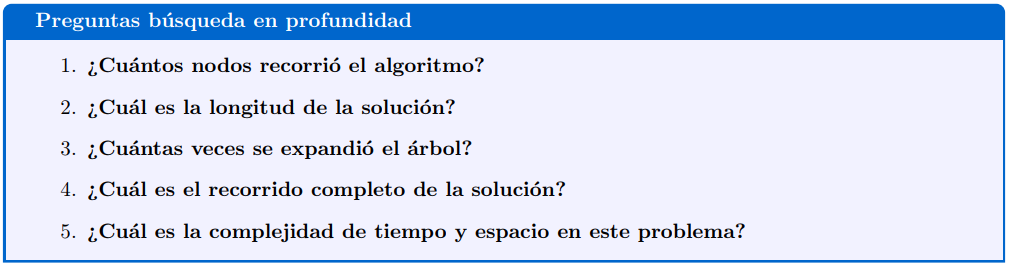

### Resultados

- 1. El algortimo recorre ['A', 'B', 'D', 'E', 'I', 'J', 'N', 'O', 'P', 'C', 'F', 'K', 'L']

        Hasta que encuentra 'L', ha recorrido 13 nodos.

- 2. La longitud de la solución es el número de aristas desde el nodo inicial 'A' hasta el 
        nodo buscado 'L', siguiendo el camino correcto, sin contar las desviaciones del DFS. 

        Longitud 3: A → C → F → L

- 3. 🔍  La expansión ocurre cuando en nodo genera hijos. (o asi no genere hijos pero procese el nodo, 
        por ejemplo el nodo?)
        Nodos que fueron expandidos antes de encontrar a L: A, B, D, E, J, C, F

- 4. ['A', 'B', 'D', 'E', 'I', 'J', 'N', 'O', 'P', 'C', 'F', 'K', 'L']

- 5. 🔍 Complejidad O(b^m), en donde:
         b = # máximo de hijos por nodo 
         m = profundidad máxima 

         En este caso b=3 y m=4


### BFS

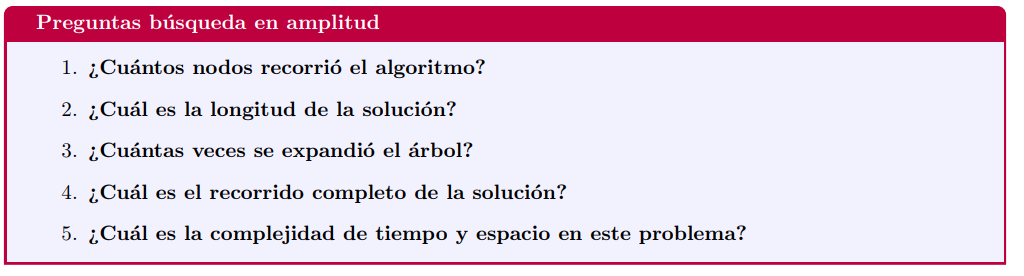

### Respuestas

- 1. Recorrido ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L'] Recorre 12 nodos

- 2. Longitud 3

- 3. 5 expansiones

- 4. ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L']

- 5. Complejidad O(b^d), en donde:

    b = # máximo de hijos por nodo
    
    d = profundida hasta llegar a la solución 
        (Nodo raiz tiene profundidad cero)

    En este caso b=3 y d=3

# Punto 2

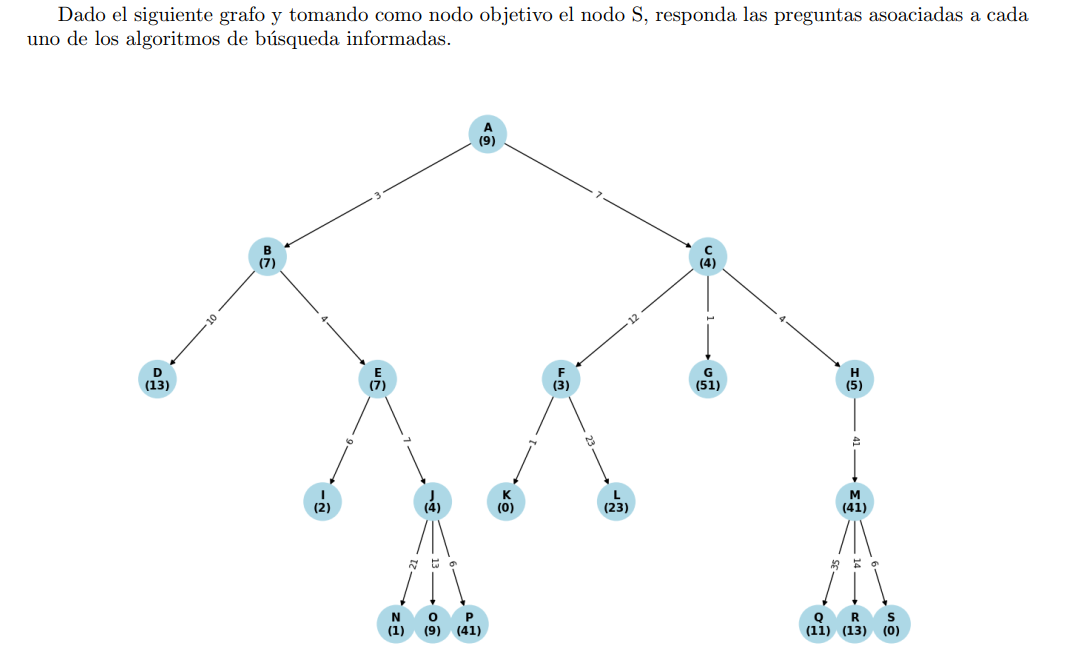

## Primero el mejor

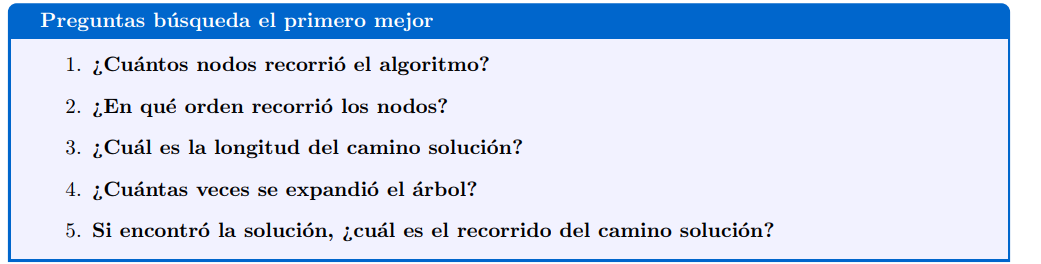

## Nota importante
En el primero el mejor, nos guiamos por el nodo con el menor valor de una función de evaluación 
f(n) = h(n)

 expande siempre el nodo con menor h(n) en la frontera, sin importar el costo de las aristas.


h(n), es una función heurística que estima cuán cerca está el nodo n del objetivo.
(corresponde al peso dentro del nodo)

No se considera el costo acumulado desde el inicio, solo la "proximidad estimada al objetivo"
(no consideramos el peso de las aristas)

Respuestas:

- 1. 5 nodos (hasta encontrar el objetivo)

- 2. A, C, F, K, H, B, E, I, J, N, O, L, D, M, S

- 3.  El camino fue: A → C → H → M → S

# Punto 3

## **🕵️Búsqueda Primero en Profundidad🕵️‍♀️**

<center>


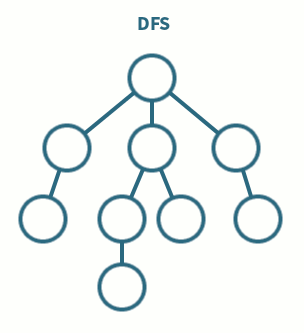

</center>

**¿Cómo utilizar el código?**

**Importaciones**

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display, clear_output
import time
import random

**Definición del grafo**

In [2]:
lista_adyacencia = {
    'S': ['A', 'B'],
    'A': ['C', 'D'],
    'C': ['G', 'H'],
    'H': ['K'],
    'D':['I'],
    'I':['K'],
    'B':['E'],
    'E':['J'],
    'J':['L'],
    'K':['M'],
    'L':['M'],
    'G':[],
    'M':[]
}

**Construcción del grafo**

In [3]:

G = nx.DiGraph()
for nodo, hijos in lista_adyacencia.items():
    for hijo in hijos:
        G.add_edge(nodo, hijo)

visitados = []

def dfs(nodo):
    visitados.append(nodo)
    for hijo in lista_adyacencia[nodo]:
        if hijo not in visitados:
            dfs(hijo)

visitados.clear()
dfs('S')

def hierarchical_pos(G, root='A', width=2., vert_gap=0.6, xcenter=0.5):
    pos = {}
    _place_nodes(G, root, width, vert_gap, xcenter, pos, None)
    return pos

def _place_nodes(G, nodo, width, vert_gap, xcenter, pos, parent):
    if parent is None:
        pos[nodo] = (xcenter, 1.0)
    else:
        level = pos[parent][1] - vert_gap
        siblings = lista_adyacencia[parent]
        index = siblings.index(nodo)
        offset = width / max(len(siblings), 1)
        pos[nodo] = (xcenter - (width / 2) + (index + 0.5) * offset, level)

    for hijo in lista_adyacencia[nodo]:
        _place_nodes(G, hijo, width/2, vert_gap, pos[nodo][0], pos, nodo)

pos = hierarchical_pos(G, root='S')

colores_padres = {}
paleta = ['skyblue', 'lightgreen', 'lightcoral', 'lightsalmon', 'plum', 'khaki', 'lightpink', 'lightseagreen']

def asignar_color_ramas(nodo, color=None):
    if color is None:
        color = random.choice(paleta)
        paleta.remove(color)

    colores_padres[nodo] = color
    for hijo in lista_adyacencia[nodo]:
        asignar_color_ramas(hijo, color)

asignar_color_ramas('S')

def dibujar_grafo(paso):
    plt.figure(figsize=(12, 8))
    colores = ['red' if nodo in visitados[:paso] else colores_padres[nodo] for nodo in G.nodes()]

    nx.draw(G, pos, with_labels=True, node_size=1000,
            node_color=colores, font_size=10, font_color='black', arrows=False)

    plt.title(f"DFS - Paso {paso}/{len(visitados)}: {visitados[:paso]}")
    plt.show()


output = widgets.Output()

boton_siguiente = widgets.Button(description="Siguiente")
boton_automatico = widgets.Button(description="Ejecutar Automático")

estado = {'paso': 0, 'automatico': False}

def avanzar_paso():
    if estado['paso'] >= len(visitados):
        estado['paso'] = 0
    else:
        estado['paso'] += 1

    with output:
        clear_output(wait=True)
        dibujar_grafo(estado['paso'])

def al_hacer_click_siguiente(b):
    estado['automatico'] = False
    avanzar_paso()

def al_hacer_click_automatico(b):
    estado['automatico'] = True
    while estado['paso'] < len(visitados) and estado['automatico']:
        avanzar_paso()
        time.sleep(0.8)

    if estado['paso'] >= len(visitados):
        estado['paso'] = 0  # Reinicia al final automáticamente


boton_siguiente.on_click(al_hacer_click_siguiente)
boton_automatico.on_click(al_hacer_click_automatico)


**Ejecución del grafo**

In [4]:
display(widgets.HBox([boton_siguiente, boton_automatico]), output)

with output:
    dibujar_grafo(0)


Output()

## Preguntas

### 1 ¿Cuantos nodos en total fueron explorados por por el algoritmo de busqueda antes de encontrar la camara de evacuacion segura?

Respuesta:

6

Recorrido realizado:

(Por convención exploramos de izquierda a derecha los nodos)

Inicia en nodo 'S'
Explora 'A' (primer hijo de 'S')
Explora 'C' (primer hijo de 'A')
Explora 'G' (primer hijo de 'C')
Retrocede a 'C' y explora 'H' (segundo hijo de 'C')
Explora 'K' (hijo de 'H')
Finalmente llega a 'M' (hijo de 'K')



### 2 ¿Se visitaron todos los nodos del grafo o solo una parte de ellos? Explica por que.

Respuesta:

Solo se visitó una parte de los nodos del grafo.

El algoritmo DFS sigue una estrategia de profundizar primero y, cuando encuentra el nodo objetivo ('M'), detiene la búsqueda. Como el DFS priorizó el primer camino disponible (S → A → C → G → H → K → M), no fue necesario explorar los nodos B, D, E, I, J y L.

El algoritmo se detiene inmediatamente después de encontrar el objetivo, sin necesidad de explorar el resto del grafo.

### 3  ¿Que sucede si el algoritmo elige otro orden de exploracion? ¿Podria encontrar una ruta diferente?
 Respuesta:

Sí, encontraría rutas diferentes dependiendo del orden de exploración:

Si en la lista de adyacencia cambiáramos el orden a 'S': ['B', 'A'], el recorrido sería S → B → E → J → L → M
Otra posibilidad sería S → A → D → I → K → M
El resultado de DFS depende directamente del orden en que los nodos hijos aparecen en la lista de adyacencia. La primera solución encontrada será la que se devuelva, sin importar si es la más óptima o no.

### 4 ¿En que casos el algoritmo podría no encontrar una solucion en este problema?

Respuesta:

El algoritmo DFS no encontraría solución en los siguientes casos:

- Si no existe un camino entre el nodo inicial 'S' y el nodo objetivo 'M' (por ejemplo, si eliminamos todos los nodos que conectan con 'M')

- Si el grafo contiene ciclos infinitos y no se implementara el control de nodos visitados 

- Si el grafo fuera extremadamente profundo, podría ocurrir un desbordamiento de pila por la recursividad del DFS

##  **🕵️Búsqueda en Amplitud🕵️‍♀️**

<center>

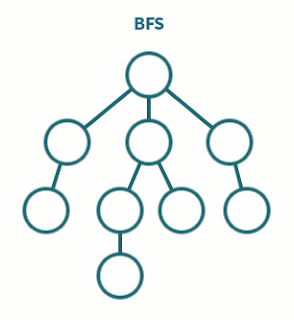



</center>

In [5]:
import networkx as nx
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display, clear_output
import time
import random
from collections import deque

In [6]:
lista_adyacencia = {
    'S': ['A', 'B'],
    'A': ['C', 'D'],
    'C': ['G', 'H'],
    'H': ['K'],
    'D':['I'],
    'I':['K'],
    'B':['E'],
    'E':['J'],
    'J':['L'],
    'K':['M'],
    'L':['M'],
    'G':[],
    'M':[]
}

In [7]:
# Crear el grafo dirigido (padres a hijos)
G = nx.DiGraph()
for nodo, hijos in lista_adyacencia.items():
    for hijo in hijos:
        G.add_edge(nodo, hijo)

# ---- BFS para capturar recorrido ----
visitados = []

def bfs(inicio):
    visitados.clear()
    cola = deque([inicio])

    while cola:
        nodo = cola.popleft()
        if nodo not in visitados:
            visitados.append(nodo)
            for vecino in lista_adyacencia[nodo]:
                cola.append(vecino)

bfs('S')

# ---- Layout jerárquico (Top-Down) ----
def hierarchical_pos(G, root='S', width=2., vert_gap=0.6, xcenter=0.5):
    pos = {}
    _place_nodes(G, root, width, vert_gap, xcenter, pos, None)
    return pos

def _place_nodes(G, nodo, width, vert_gap, xcenter, pos, parent):
    if parent is None:
        pos[nodo] = (xcenter, 1.0)
    else:
        nivel = pos[parent][1] - vert_gap
        hermanos = lista_adyacencia[parent]
        idx = hermanos.index(nodo)
        offset = width / max(len(hermanos), 1)
        pos[nodo] = (xcenter - (width / 2) + (idx + 0.5) * offset, nivel)

    for hijo in lista_adyacencia[nodo]:
        _place_nodes(G, hijo, width/2, vert_gap, pos[nodo][0], pos, nodo)

pos = hierarchical_pos(G)

# ---- Asignar colores por rama (cada padre y sus hijos tienen un color) ----
colores_padres = {}
paleta = ['skyblue', 'lightgreen', 'lightcoral', 'lightsalmon', 'plum', 'khaki', 'lightpink', 'lightseagreen']

def asignar_color_ramas(nodo, color=None):
    if color is None:
        color = random.choice(paleta)
        paleta.remove(color)

    colores_padres[nodo] = color
    for hijo in lista_adyacencia[nodo]:
        asignar_color_ramas(hijo, color)

asignar_color_ramas('S')

# ---- Dibujar grafo hasta cierto paso ----
def dibujar_grafo(paso):
    plt.figure(figsize=(12, 8))
    colores = ['red' if nodo in visitados[:paso] else colores_padres[nodo] for nodo in G.nodes()]

    nx.draw(G, pos, with_labels=True, node_size=1000,
            node_color=colores, font_size=10, font_color='black', arrows=False)

    plt.title(f"BFS - Paso {paso}/{len(visitados)}: {visitados[:paso]}")
    plt.show()

# ---- Widgets: Botones y Output ----
output = widgets.Output()

boton_siguiente = widgets.Button(description="Siguiente")
boton_automatico = widgets.Button(description="Ejecutar Automático")

# Estado global
estado = {
    'paso': 0,
    'automatico': False
}

# ---- Funciones de avance ----
def avanzar_paso():
    if estado['paso'] >= len(visitados):
        estado['paso'] = 0  # Reinicia al final
    else:
        estado['paso'] += 1

    with output:
        clear_output(wait=True)
        dibujar_grafo(estado['paso'])

# ---- Eventos de botones ----
def al_hacer_click_siguiente(b):
    avanzar_paso()

def al_hacer_click_automatico(b):
    while estado['paso'] < len(visitados):
        avanzar_paso()
        time.sleep(0.8)

    estado['paso'] = 0  # Reinicia al final

# Conectar botones con funciones
boton_siguiente.on_click(al_hacer_click_siguiente)
boton_automatico.on_click(al_hacer_click_automatico)

# ---- Mostrar interfaz completa ----
display(widgets.HBox([boton_siguiente, boton_automatico]), output)

# Mostrar primer paso (sin visitar)
with output:
    dibujar_grafo(0)


Output()

## Preguntas

### 1. ¿Cuántos nodos fueron visitados por BFS hasta alcanzar la cámara de evacuación?
Respuesta:

12 nodos fueron visitados antes de alcanzar la cámara de evacuación (M).

BFS explora por niveles, en este orden:

Nivel 0: S
Nivel 1: A, B
Nivel 2: C, D, E
Nivel 3: G, H, I, J
Nivel 4: K, L
Nivel 5: M (objetivo)
Por lo tanto, se visitaron S, A, B, C, D, E, G, H, I, J, K, y L antes de llegar a M

### 2. ¿BFS encontró una ruta más corta que la encontrada con DFS? ¿Por qué sucede esto?

Respuesta



Camino encontrado por BFS: S → A → D → I → K → M (5 aristas)

Camino encontrado por DFS: S → A → C  → H → K → M (5 aristas)

BFS encuentra siempre la ruta más corta en términos de número de aristas porque explora todos los nodos a una distancia k del inicio antes de explorar cualquier nodo a distancia k+1. Esto garantiza que el primer camino encontrado a cualquier nodo será el más corto posible.

En contraste, DFS se "sumerge" profundamente en una rama antes de retroceder, lo que puede llevar a encontrar caminos más largos si el objetivo está en otra rama menos profunda.

### ¿Qué ventaja tiene BFS en este problema específico respecto a DFS?

Respuesta:

- BFS encuentra la solución más corta en un grafo sin pesos.

BFS explora todas las direcciones posibles de forma uniforme, en lugar de comprometerse profundamente con una sola dirección como hace DFS, lo que es más seguro en situaciones de emergencia.

Identificación de alternativas cercanas: BFS identifica automáticamente rutas alternativas de longitud similar

### Nota importante

BFS vs DFS: Eficiencia y Optimalidad

Necesitamos distinguir entre dos conceptos diferentes:

1. Eficiencia de exploración
DFS fue más eficiente en exploración en este caso específico:

DFS exploró solo 7 nodos: S → A → C → G → H → K → M
BFS exploró 13 nodos: S, A, B, C, D, E, G, H, I, J, K, L, M

2. Optimalidad del camino
BFS encontró un camino más corto:

Camino encontrado por BFS: S → A → D → I → K → M (5 aristas)
Camino encontrado por DFS: S → A → C → H → K → M (6 aristas)
La pregunta específica era sobre si BFS encontró una ruta más corta (que sí), no sobre cuál algoritmo exploró menos nodos. Es un trade-off importante:

DFS: Puede ser más eficiente en exploración (examina menos nodos antes de encontrar una solución), pero no garantiza el camino más corto.

BFS: Garantiza el camino más corto en términos de número de aristas, pero puede explorar muchos más nodos en el proceso.

# Punto 4